# **Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
files.upload()


{}

# **Definindo funções para leitura**

In [ ]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

# **Lendo arquivo CSV com informações do Handover**

In [ ]:
handover = pd.read_csv('handover_vector.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

In [ ]:
vectors = handover[handover.type=='vector']
len(vectors)

238

# **Unificando os módulos**

In [ ]:
vectors.name.unique(), vectors.module.unique()

(array(['handover_gnb:vector', 'cbrFrameDelay:vector', 'cbrRcvdPkt:vector',
        'servingCell:vector', 'handover_id:vector', 'handover_rssi:vector',
        'handover_currentId:vector', 'handover_currentRssi:vector',
        'handover_hysteresis:vector', 'handover_sinr:vector',
        'handover_rsrp:vector', 'handover_trigger:vector',
        'handover_distance_ue:vector', 'handover_id_lin:vector',
        'handover_rssi_lin:vector', 'handover_currentId_lin:vector',
        'handover_currentRssi_lin:vector',
        'handover_hysteresis_lin:vector', 'handover_delta:vector',
        'handover_distance:vector', 'handover_power:vector',
        'handover_zhop:vector', 'handover_delta_pred:vector',
        'rlcThroughputDl:vector'], dtype=object),
 array(['Handover.gnb1.cellularNic.ip2nic',
        'Handover.gnb2.cellularNic.ip2nic',
        'Handover.gnb3.cellularNic.ip2nic',
        'Handover.gnb4.cellularNic.ip2nic',
        'Handover.gnb5.cellularNic.ip2nic',
        'Handover.gnb6

In [ ]:
vectors.head(6)

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
184,DL-2-20240526-23:07:08-9422,vector,Handover.gnb1.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[0.0500101068, 0.0500101068, 0.0500101068, 3.0...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
189,DL-2-20240526-23:07:08-9422,vector,Handover.gnb2.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[0.0500101068, 0.0500101636, 3.0500101068, 13....","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
194,DL-2-20240526-23:07:08-9422,vector,Handover.gnb3.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[4.0500101068, 17.0500101068, 29.0500101068, 3...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
199,DL-2-20240526-23:07:08-9422,vector,Handover.gnb4.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[2.0500101068, 14.0500101068, 24.0500101068, 2...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
204,DL-2-20240526-23:07:08-9422,vector,Handover.gnb5.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[4.0500101068, 27.0500101068, 42.0500101068, 4...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
209,DL-2-20240526-23:07:08-9422,vector,Handover.gnb6.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[29.0500101068, 47.0500101068, 54.0500101068, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."


In [ ]:
vec = vectors[(vectors.name == 'handover_id:vector') | (vectors.name == 'handover_rssi:vector') |  (vectors.name == 'handover_distance_ue:vector') | (vectors.name == 'handover_currentId:vector') | (vectors.name == 'handover_currentRssi:vector') | (vectors.name == 'handover_hysteresis:vector')| (vectors.name == 'handover_trigger:vector')| (vectors.name == 'handover_zhop:vector') | (vectors.name == 'handover_rsrp:vector').iloc[:]  | (vectors.name == 'handover_sinr:vector')].iloc[:] # take some vector

# Criar uma categoria ordenada com a ordem desejada

cat_order = pd.CategoricalDtype(['handover_trigger:vector', 'handover_id:vector',
                                  'handover_rssi:vector', 'handover_currentId:vector',
                                  'handover_currentRssi:vector','handover_hysteresis:vector',
                                  'handover_rsrp:vector','handover_sinr:vector','handover_distance_ue:vector','handover_zhop:vector'], ordered=True)

# Aplicar a categoria ordenada à coluna 'name'
vec['name'] = vec['name'].astype(cat_order)

# Ordenar o DataFrame pelo campo 'name'

vec = vec.sort_values(['name', 'module'], ascending=[True, True])

vec.head(140)

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
274,DL-2-20240526-23:07:08-9422,vector,Handover.ue[0].cellularNic.nrPhy,handover_trigger:vector,NaN,None,"[0.0, 0.0, 3.0, 4.0, 14.0, 15.0, 18.0, 19.0, 2...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
389,DL-2-20240526-23:07:08-9422,vector,Handover.ue[1].cellularNic.nrPhy,handover_trigger:vector,NaN,None,"[0.0, 0.0, 4.0, 10.0, 15.0, 19.0, 21.0, 28.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
504,DL-2-20240526-23:07:08-9422,vector,Handover.ue[2].cellularNic.nrPhy,handover_trigger:vector,NaN,None,"[0.0, 0.0, 0.0, 12.0, 16.0, 26.0, 27.0, 36.0, ...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
584,DL-2-20240526-23:07:08-9422,vector,Handover.ue[3].cellularNic.nrPhy,handover_trigger:vector,NaN,None,"[0.0, 0.0, 4.0, 5.0, 6.0, 12.0, 13.0, 14.0, 16...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ..."
699,DL-2-20240526-23:07:08-9422,vector,Handover.ue[4].cellularNic.nrPhy,handover_trigger:vector,NaN,None,"[0.0, 0.0, 4.0, 5.0, 9.0, 11.0, 13.0, 14.0, 25...","[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ..."
...,...,...,...,...,...,...,...,...
899,DL-2-20240526-23:07:08-9422,vector,Handover.ue[5].cellularNic.nrPhy,handover_zhop:vector,NaN,None,"[1e-05, 5.00001, 9.00001, 17.00001, 27.00001, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1014,DL-2-20240526-23:07:08-9422,vector,Handover.ue[6].cellularNic.nrPhy,handover_zhop:vector,NaN,None,"[1e-05, 2.00001, 3.00001, 13.00001, 24.00001, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1129,DL-2-20240526-23:07:08-9422,vector,Handover.ue[7].cellularNic.nrPhy,handover_zhop:vector,NaN,None,"[14.00001, 23.00001, 29.00001, 42.00001, 65.00...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1244,DL-2-20240526-23:07:08-9422,vector,Handover.ue[8].cellularNic.nrPhy,handover_zhop:vector,NaN,None,"[4.00001, 17.00001, 20.00001, 27.00001, 29.000...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."


# **Lendo apenas as informações da linha de vecvalue**

In [ ]:
#vec = vec[['vecvalue','vectime']].iloc[:];
import ast

num_ues = 10
df_tempo = []
df_trigger = []
df_id = []
df_rssi = []
df_current_id = []
df_current_rssi = []
df_hysteresis = []
df_rsrp = []
df_sinr = []
df_hop = []
df_distance_ue = []
# convertendo em linhas

tempo = vec['vecvalue'].iloc[0]
tempo = np.array(tempo).astype(str)
tempo = pd.Series(tempo).str.split(',').explode().str.strip().reset_index(drop=True)

trigger1 = vec['vecvalue'].iloc[0]
trigger1 = np.array(trigger1).astype(str)
trigger1 = pd.Series(trigger1).str.split(',').explode().str.strip().reset_index(drop=True)

trigger1 = trigger1.astype(float).astype(int)

trigger2 = vec['vecvalue'].iloc[1]
trigger2 = np.array(trigger2).astype(str)
trigger2 = pd.Series(trigger2).str.split(',').explode().str.strip().reset_index(drop=True)

trigger2 = trigger2.astype(float).astype(int)

trigger3 = vec['vecvalue'].iloc[2]
trigger3 = np.array(trigger3).astype(str)
trigger3 = pd.Series(trigger3).str.split(',').explode().str.strip().reset_index(drop=True)

trigger3 = trigger3.astype(float).astype(int)


trigger4 = vec['vecvalue'].iloc[3]
trigger4 = np.array(trigger4).astype(str)
trigger4 = pd.Series(trigger4).str.split(',').explode().str.strip().reset_index(drop=True)

trigger4 = trigger4.astype(float).astype(int)


trigger5 = vec['vecvalue'].iloc[4]
trigger5 = np.array(trigger5).astype(str)
trigger5 = pd.Series(trigger5).str.split(',').explode().str.strip().reset_index(drop=True)

trigger5 = trigger5.astype(float).astype(int)


for i in range(num_ues):
    tempo_in = vec['vectime'].iloc[i]
    tempo_in = np.array(tempo_in).astype(str)
    tempo_in = pd.Series(tempo_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_tempo.append(tempo_in)

# concatenar as séries criadas e transformar em DataFrame
tempo = pd.concat(df_tempo, ignore_index=True)
tempo = pd.DataFrame({'tempo': tempo})

# Visualizar as primeiras linhas do DataFrame
tempo.head()


# convertendo em linhas

for i in range(num_ues):
    trigger_in = vec['vecvalue'].iloc[i]
    trigger_in = np.array(trigger_in).astype(str)
    trigger_in = pd.Series(trigger_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_trigger.append(trigger_in)

# concatenar as séries criadas e transformar em DataFrame
trigger = pd.concat(df_trigger, ignore_index=True)
trigger = pd.DataFrame({'trigger': trigger})

# Visualizar as primeiras linhas do DataFrame
trigger.head()


# convertendo em linhas

for i in range(num_ues,num_ues*2):
    id_in = vec['vecvalue'].iloc[i]
    id_in = np.array(id_in).astype(str)
    id_in = pd.Series(id_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_id.append(id_in)

# concatenar as séries criadas e transformar em DataFrame
id = pd.concat(df_id, ignore_index=True)
id = pd.DataFrame({'id': id})

# Visualizar as primeiras linhas do DataFrame
id.head()


# convertendo em linhas

for i in range(num_ues*2,num_ues*3):
    rssi_in = vec['vecvalue'].iloc[i]
    rssi_in = np.array(rssi_in).astype(str)
    rssi_in = pd.Series(rssi_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_rssi.append(rssi_in)

# concatenar as séries criadas e transformar em DataFrame
rssi = pd.concat(df_rssi, ignore_index=True)
rssi = pd.DataFrame({'rssi': rssi})

# Visualizar as primeiras linhas do DataFrame
rssi.head()


# convertendo em linhas

for i in range(num_ues*3,num_ues*4):
    current_id_in = vec['vecvalue'].iloc[i]
    current_id_in = np.array(current_id_in).astype(str)
    current_id_in = pd.Series(current_id_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_current_id.append(current_id_in)

# concatenar as séries criadas e transformar em DataFrame
current_id = pd.concat(df_current_id, ignore_index=True)
current_id = pd.DataFrame({'current_id': current_id})

# Visualizar as primeiras linhas do DataFrame
current_id.head()


# convertendo em linhas

for i in range(num_ues*4,num_ues*5):
    current_rssi_in = vec['vecvalue'].iloc[i]
    current_rssi_in = np.array(current_rssi_in).astype(str)
    current_rssi_in = pd.Series(current_rssi_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_current_rssi.append(current_rssi_in)

# concatenar as séries criadas e transformar em DataFrame
current_rssi = pd.concat(df_current_rssi, ignore_index=True)
current_rssi = pd.DataFrame({'current_rssi': current_rssi})

# Visualizar as primeiras linhas do DataFrame
current_rssi.head()



# convertendo em linhas

for i in range(num_ues*5,num_ues*6):
    hysteresis_in = vec['vecvalue'].iloc[i]
    hysteresis_in = np.array(hysteresis_in).astype(str)
    hysteresis_in = pd.Series(hysteresis_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_hysteresis.append(hysteresis_in)

# concatenar as séries criadas e transformar em DataFrame
hysteresis = pd.concat(df_hysteresis, ignore_index=True)
hysteresis = pd.DataFrame({'hysteresis': hysteresis})

# Visualizar as primeiras linhas do DataFrame
hysteresis.head()



# convertendo em linhas

for i in range(num_ues*6,num_ues*7):
    rsrp_in = vec['vecvalue'].iloc[i]
    rsrp_in = np.array(rsrp_in).astype(str)
    rsrp_in = pd.Series(rsrp_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_rsrp.append(rsrp_in)

# concatenar as séries criadas e transformar em DataFrame
rsrp = pd.concat(df_rsrp, ignore_index=True)
rsrp = pd.DataFrame({'rsrp': rsrp})

# Visualizar as primeiras linhas do DataFrame
rsrp.head()


# convertendo em linhas

for i in range(num_ues*7,num_ues*8):
    sinr_in = vec['vecvalue'].iloc[i]
    sinr_in = np.array(sinr_in).astype(str)
    sinr_in = pd.Series(sinr_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_sinr.append(sinr_in)

# concatenar as séries criadas e transformar em DataFrame
sinr = pd.concat(df_sinr, ignore_index=True)
sinr = pd.DataFrame({'sinr': sinr})

# Visualizar as primeiras linhas do DataFrame
sinr.head()



# convertendo em linhas

for i in range(num_ues*8,num_ues*9):
    distance_in = vec['vecvalue'].iloc[i]
    distance_in = np.array(distance_in).astype(str)
    distance_in = pd.Series(distance_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_distance_ue.append(distance_in)

# concatenar as séries criadas e transformar em DataFrame
distance_ue = pd.concat(df_distance_ue, ignore_index=True)
distance_ue = pd.DataFrame({'distance_ue': distance_ue})

# Visualizar as primeiras linhas do DataFrame
distance_ue.head()

hop1 =  vec['vecvalue'].iloc[45]
hop1 = np.array(hop1).astype(str)
hop1 = pd.Series(hop1).str.split(',').explode().str.strip().reset_index(drop=True)


hop2 =  vec['vecvalue'].iloc[46]
hop2 = np.array(hop2).astype(str)
hop2 = pd.Series(hop2).str.split(',').explode().str.strip().reset_index(drop=True)


hop3 =  vec['vecvalue'].iloc[47]
hop3 = np.array(hop3).astype(str)
hop3 = pd.Series(hop3).str.split(',').explode().str.strip().reset_index(drop=True)


hop4 =  vec['vecvalue'].iloc[48]
hop4 = np.array(hop4).astype(str)
hop4 = pd.Series(hop4).str.split(',').explode().str.strip().reset_index(drop=True)


hop5 = vec['vecvalue'].iloc[49]
hop5 = np.array(hop5).astype(str)
hop5 = pd.Series(hop5).str.split(',').explode().str.strip().reset_index(drop=True)

# **Renomeando as colunas**

In [ ]:
concatenated_df = pd.concat([tempo,id,rssi,current_id,current_rssi,hysteresis,rsrp,sinr,distance_ue,trigger], axis=1)

concatenated_df.head()

,tempo,id,rssi,current_id,current_rssi,hysteresis,rsrp,sinr,distance_ue,trigger
0,0.0,1.0,37.659955360211,2.0,-39.105812885675,3.7659955360211,-59.840044639789,37.659955360211,121.10754871796,1.0
1,0.0,2.0,57.479987618408,2.0,57.479987618408,5.7479987618408,-40.020012381592,57.479987618408,389.34699709833,0.0
2,3.0,4.0,50.94974107264,2.0,39.65152800616,5.094974107264,-46.55025892736,50.94974107264,215.31639115401,1.0
3,4.0,4.0,71.897187336854,4.0,71.897187336854,7.1897187336854,-25.602812663146,71.897187336854,73.919597373176,0.0
4,14.0,2.0,52.37414626364,4.0,37.097182209261,5.237414626364,-45.12585373636,52.37414626364,278.96062744902,1.0


# **Concatenando os vetores**

In [ ]:
concatenated_df.columns = ['tempo', 'id','rssi','current_id','current_rssi','hysteresis','rsrp','sinr','distance_ue','trigger']


concatenated_df['id'] = concatenated_df['id'].astype(float).astype(int)

concatenated_df['current_id'] = concatenated_df['current_id'].astype(float).astype(int)

concatenated_df['trigger'] = concatenated_df['trigger'].astype(float).astype(int)

concatenated_df.head(10)



,tempo,id,rssi,current_id,current_rssi,hysteresis,rsrp,sinr,distance_ue,trigger
0,0.0,1,37.659955360211,2,-39.105812885675,3.7659955360211,-59.840044639789,37.659955360211,121.10754871796,1
1,0.0,2,57.479987618408,2,57.479987618408,5.7479987618408,-40.020012381592,57.479987618408,389.34699709833,0
2,3.0,4,50.94974107264,2,39.65152800616,5.094974107264,-46.55025892736,50.94974107264,215.31639115401,1
3,4.0,4,71.897187336854,4,71.897187336854,7.1897187336854,-25.602812663146,71.897187336854,73.919597373176,0
4,14.0,2,52.37414626364,4,37.097182209261,5.237414626364,-45.12585373636,52.37414626364,278.96062744902,1
5,15.0,2,57.456252553077,7,48.555008667852,5.7456252553077,-40.043747446923,57.456252553077,195.02329368201,1
6,18.0,1,55.885879885338,2,34.90690090487,5.5885879885338,-41.614120114662,55.885879885338,265.78037414832,1
7,19.0,1,64.385042641456,1,64.385042641456,6.4385042641456,-33.114957358544,64.385042641456,73.333439180338,0
8,20.0,1,74.136442227762,1,74.136442227762,7.4136442227762,-23.898791840262,74.136442227762,36.025259896849,0
9,24.0,5,51.970816016438,1,46.59335844196,5.1970816016438,-45.529183983562,51.970816016438,221.58410034118,1


# **Verificando se há valores NAN**

In [ ]:
print(concatenated_df['tempo'].isnull().values.any())

print(concatenated_df['tempo'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['current_id'].isnull().values.any())

print(concatenated_df['current_id'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['current_rssi'].isnull().values.any())

print(concatenated_df['current_rssi'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['hysteresis'].isnull().values.any())

print(concatenated_df['hysteresis'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['id'].isnull().values.any())

print(concatenated_df['id'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['rssi'].isnull().values.any())

print(concatenated_df['rssi'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['trigger'].isnull().values.any())

print(concatenated_df['trigger'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['rsrp'].isnull().values.any())

print(concatenated_df['rsrp'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['sinr'].isnull().values.any())

print(concatenated_df['sinr'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['distance_ue'].isnull().values.any())

print(concatenated_df['distance_ue'].isnull().sum())

False
0


In [ ]:
print(hop1.isnull().values.any())

print(hop1.isnull().sum())

len(hop1)



False
0


86059

In [ ]:
len(concatenated_df)

1433817

In [ ]:
concatenated_df.shape

(1433817, 10)

# **Gráfico de nível de sinal**

<ipython-input-25-2d12afa3c425>:5: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,100)


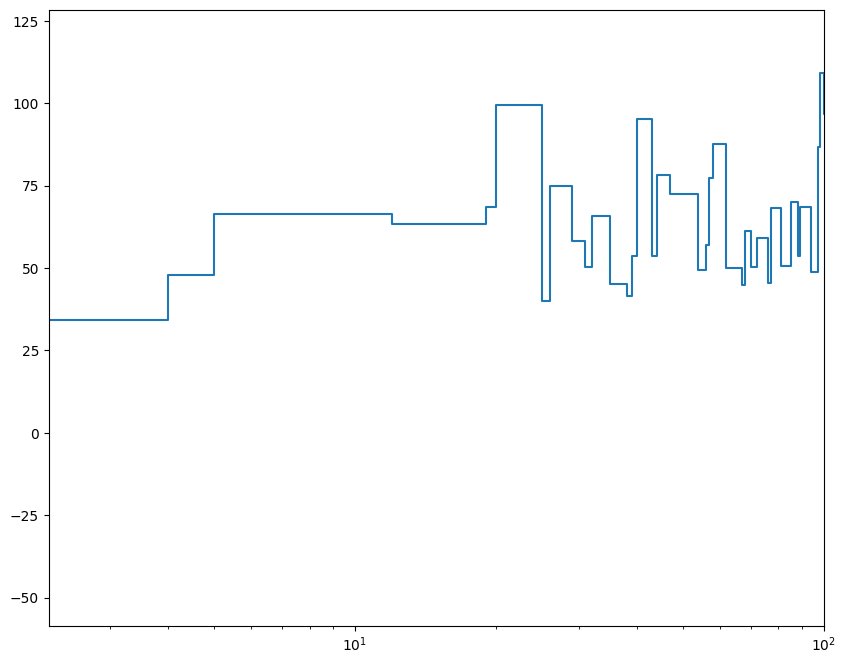

In [ ]:
vec = vectors[vectors.name == 'handover_currentRssi:vector'].iloc[0]  # take some vector
plt.figure(figsize=(10,8))
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xscale('log')
plt.xlim(0,100)
plt.show()


In [ ]:
"""somevectors = vectors[(vectors.name == 'handover_currentRssi:vector') |(vectors.name == 'handover_rssi:vector')| (vectors.name == 'handover_hysteresis:vector')][:]
plt.figure(figsize=(10,8))
for row in somevectors.itertuples():
    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')
    plt.xscale('log')
plt.title(somevectors.name.values[0])
plt.legend(somevectors.module)
plt.show()"""

In [ ]:
print(list(concatenated_df.columns))

['tempo', 'id', 'rssi', 'current_id', 'current_rssi', 'hysteresis', 'rsrp', 'sinr', 'distance_ue', 'trigger']


In [ ]:
concatenated_df.describe()

,id,current_id
count,411615.000000,411615.000000
mean,0.485216,4.483362
std,0.499782,2.346976
min,0.000000,1.000000
25%,0.000000,3.000000
50%,0.000000,5.000000
75%,1.000000,5.000000
max,1.000000,10.000000


In [ ]:
concatenated_df.to_csv('csv_logistic.csv', index=False)

